# Decision Tree Algorithm

Decision Tree is a type of `supervised learning algorithm` that is mostly used in `classification problems`. 
It works for both `continuous` as well as `categorical output variables`. 

It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

<img src="https://miro.medium.com/v2/resize:fit:1400/0*g4fblQAEbjS_arPX.png" alt="Decision Tree Image" 
        style="width: 500px" />

## **Important Terms for Decision Tree**

- **Root Node**: It represents the entire dataset, which further gets divided into two or more homogeneous sets.
- **Splitting**: It is a process of dividing a node into two or more sub-nodes.
- **Decision Node**: When a sub-node splits into further sub-nodes, then it is called the decision node.
- **Leaf/Terminal Node**: Nodes do not split is called Leaf or Terminal node.
- **Pruning**: When we remove sub-nodes of a decision node, this process is called pruning. You can say the opposite process of splitting.
- **Information Gain**: The `information gain` is based on the `decrease in entropy` after a dataset is split on an attribute. Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).
- **Entropy**: A decision tree algorithm always tries to maximize Information Gain. The information gain is based on the decrease in entropy after a dataset is split on an attribute. Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).
- **Gini Index**: Gini index says, if we select two items from a population at random then they must be of the same class and probability for this is 1 if the population is pure.

## Entropy
$$ \text{Entropy} = - \sum_i \left(p_i \cdot \log_2 p_i\right) $$

Here (p_i) is the probability of class (i).
Range (binary): (0) to (1) (for multi-class the maximum can be > 1).
Meaning: Measures randomness/impurity (based on information theory).

## Gini Index
$$ \text{Gini} = 1 - \sum_i p_i^2 $$

Here (p_i) is the probability of class (i).
Range (binary): (0) to (0.5) (0 for a pure set, 0.5 for maximum impurity).
Meaning: Measures impurity using squared probabilities (computationally faster).

## Exmple of Decision Tree:

In [1]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
# load the dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [4]:
df = df.drop('deck', axis=1 )

#impute missing values of age, and fare using median
imputer = SimpleImputer(strategy='median')
df[['age', 'fare']]= imputer.fit_transform(df[['age', 'fare']])

# impute missing values of embark and embarked_town using mode
imputer = SimpleImputer(strategy='most_frequent')
df[['embark_town', 'embarked']] = imputer.fit_transform(df[['embark_town', 'embarked']])


In [5]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [7]:
# Encode the categorical and object variables using for loop and labelencoder
le = LabelEncoder()
for col in df.select_dtypes(include=['category', 'object']):
    df[col] = le.fit_transform(df[col])

In [8]:
# split the data into X and y
X = df.drop(['survived', 'alive'], axis=1)
y = df['survived']
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# create and train teh model with pred
model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

[[92 13]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



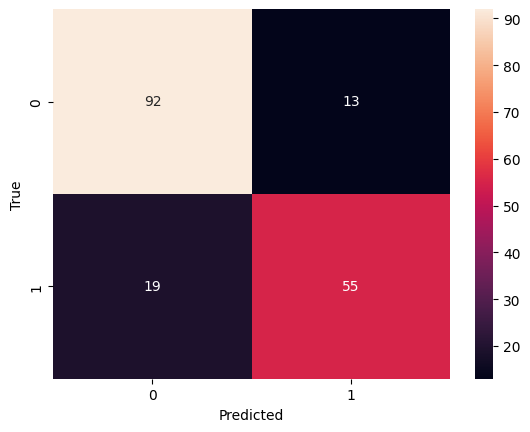

In [10]:
# predict the model
y_pred = model.predict(X_test)
# evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [11]:
# create and train teh model with pred
model_gini = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=5)
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

[[91 14]
 [21 53]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



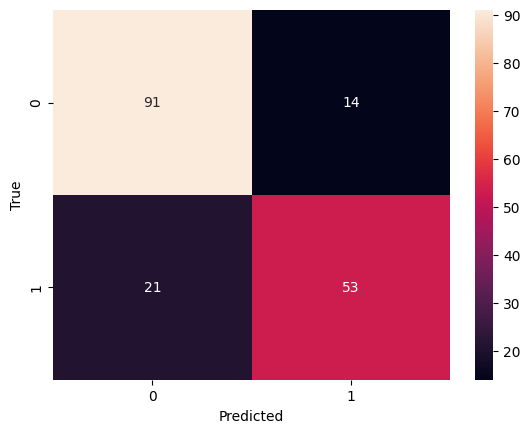

In [12]:
# predict the model
y_pred = model_gini.predict(X_test)
# evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

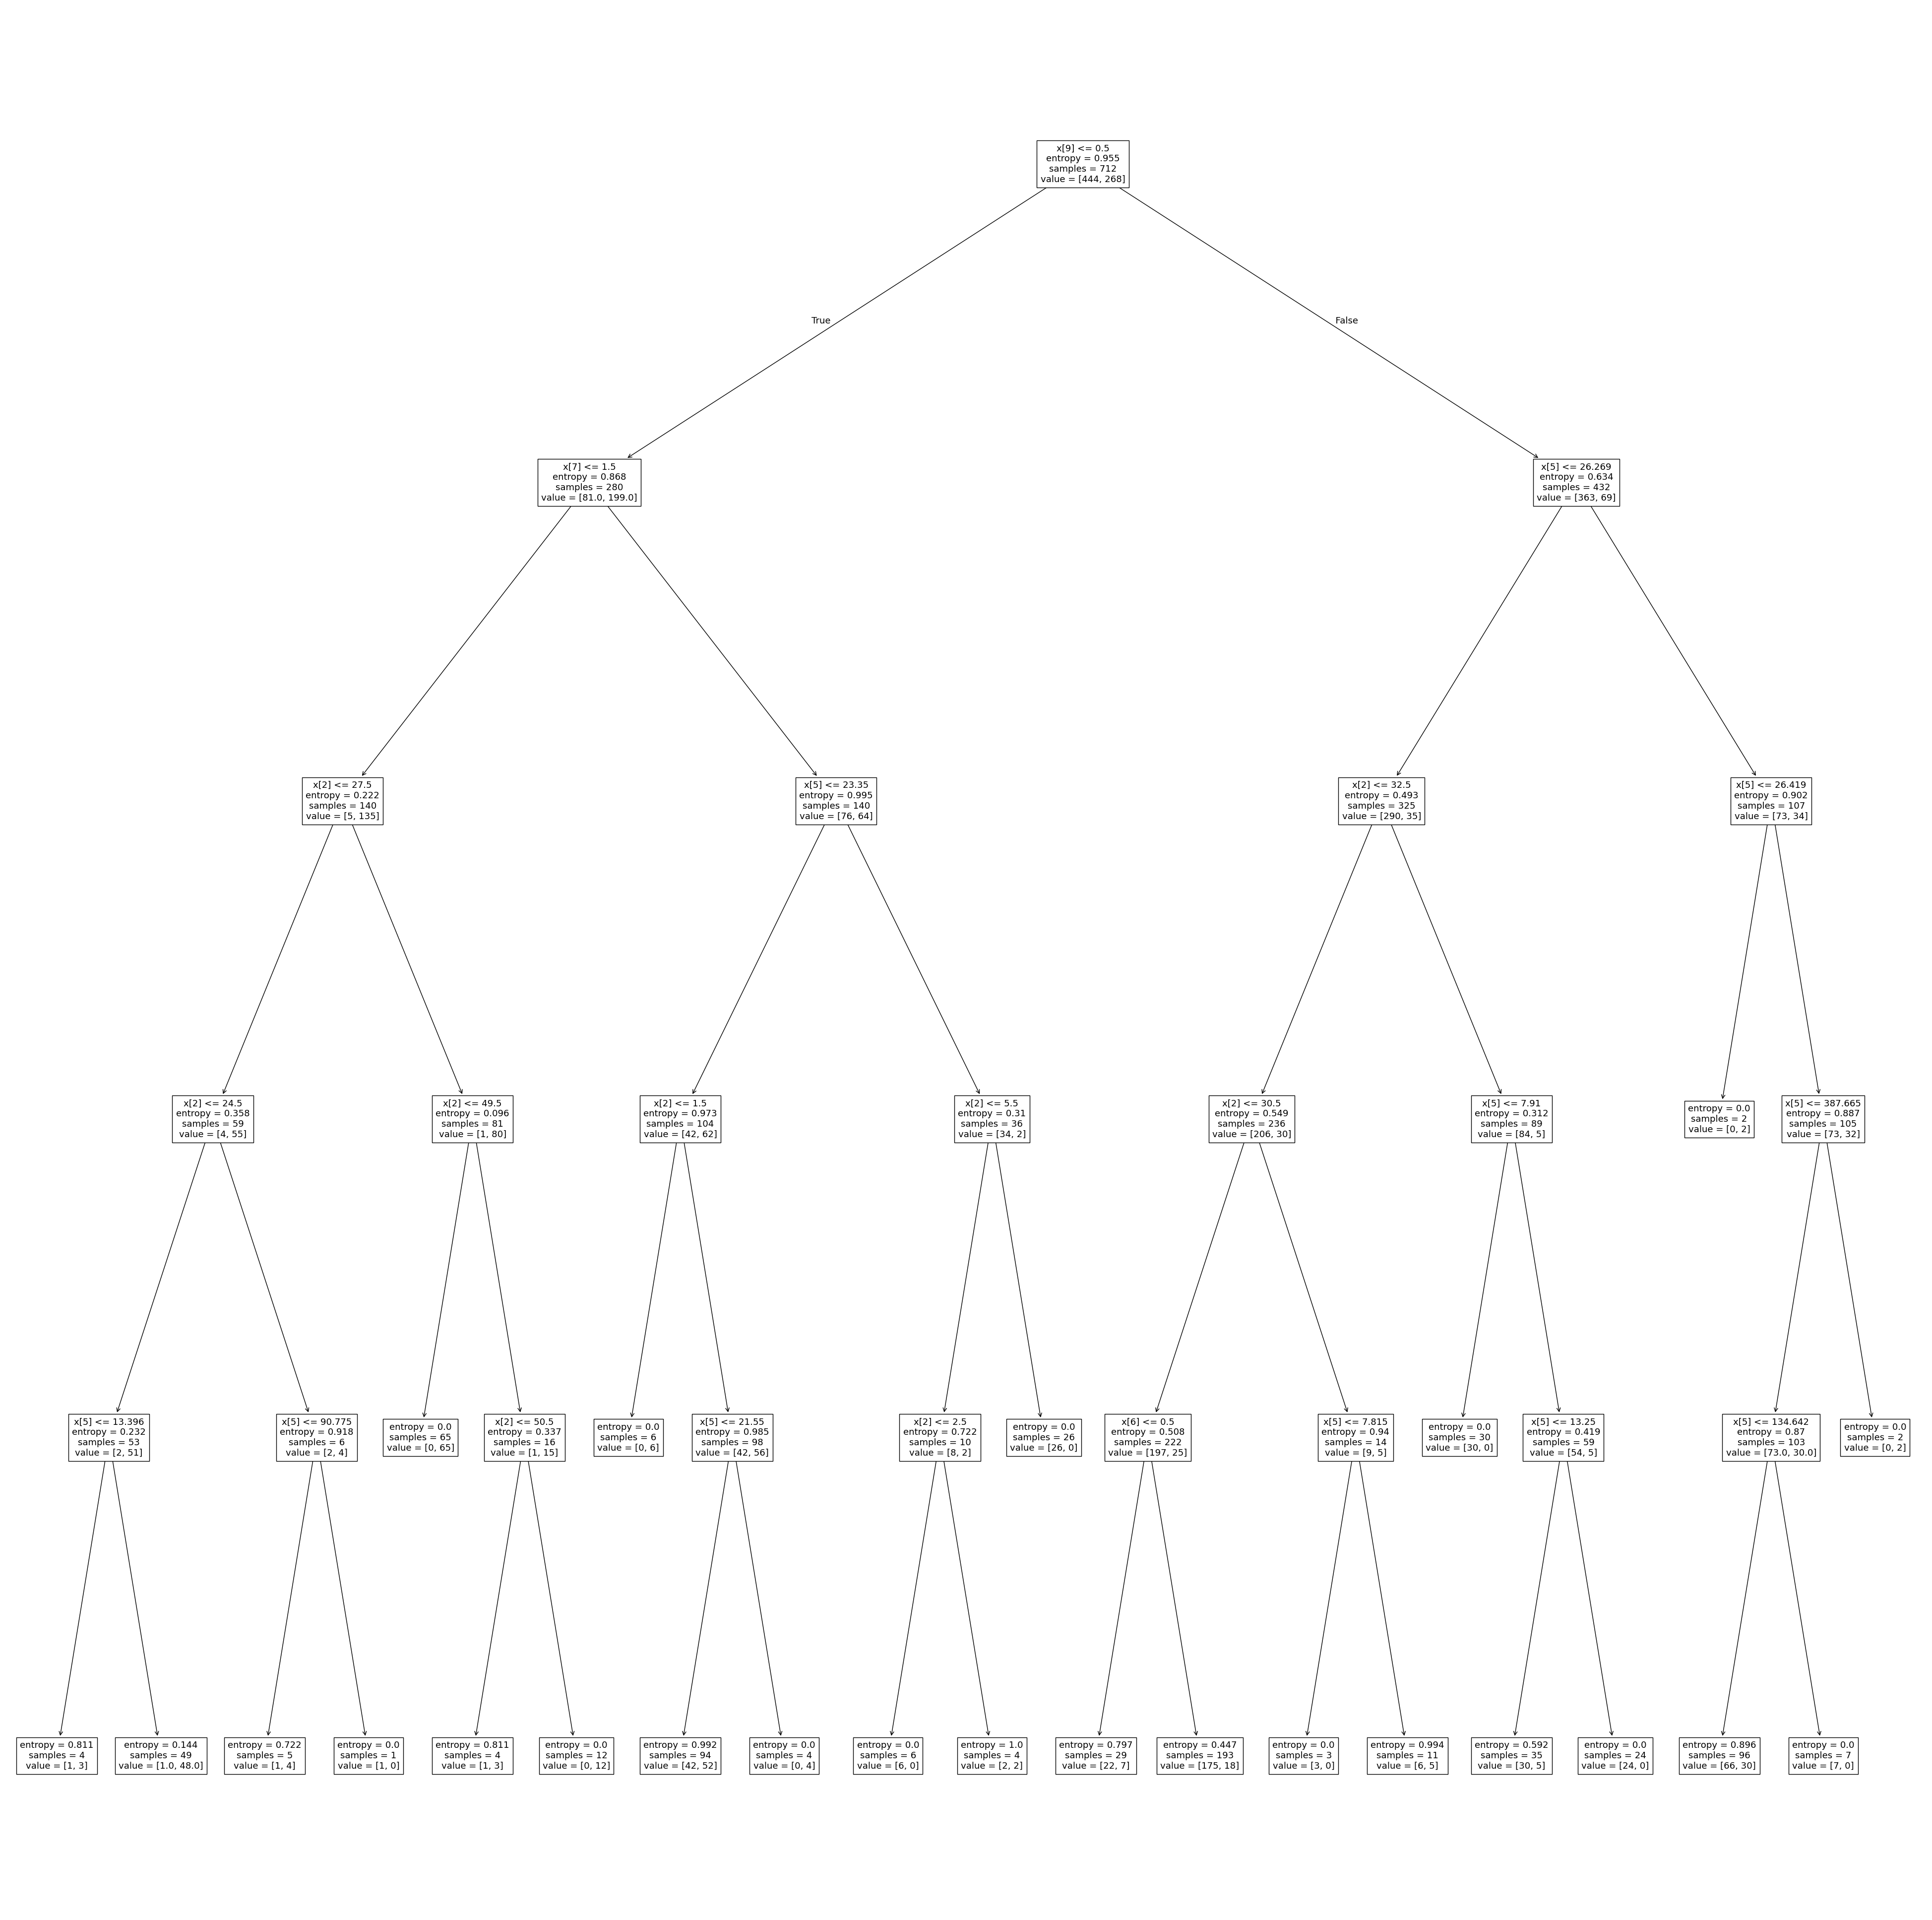

In [13]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
plot_tree(model)
plt.savefig("tree.png")
plt.show()

In [14]:
rg_dataset = pd.read_csv('multiple_linear_regression_dataset.csv') 

## Regression 

In [15]:
import pandas as pd

In [16]:
rg_dataset = pd.read_csv('multiple_linear_regression_dataset.csv') 
rg_dataset.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [17]:
rg_dataset.isnull().sum()

age           0
experience    0
income        0
dtype: int64

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
model = DecisionTreeRegressor()

In [20]:
x = rg_dataset.drop('income' , axis = 1)
y = rg_dataset['income']

In [23]:
model.fit(x, y)

DecisionTreeRegressor()

In [24]:
model.predict(x)

array([30450., 35670., 31580., 40130., 47830., 41630., 41340., 37650.,
       40250., 45150., 27840., 46110., 36720., 34800., 51300., 38900.,
       63600., 30870., 44190., 48700.])

In [27]:
y_pred= model.predict(x)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
print('MSE: ', mean_squared_error(y, y_pred))
print('R2: ', r2_score(y, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y, y_pred))
print('MAE: ', mean_absolute_error(y, y_pred))
# root mean squared error
print('RMSE: ', np.sqrt(mean_squared_error(y, y_pred)))

MSE:  0.0
R2:  1.0
MAPE:  0.0
MAE:  0.0
RMSE:  0.0


### I know this regression model isn’t very good—it’s just an example, so we don’t need to refine it further.